**Exploratory Data Analysis for HMDA**

Ideas: 
Outcome Variable,
Quantity of Filers,
Property Type,
Loan Type

In [1]:
%matplotlib inline
import os
import requests
import matplotlib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

**Load data into a dataframe:**

In [2]:
filepath = os.path.abspath(os.path.join( "..", "fixtures", "hmda2017sample.csv"))
DATA = pd.read_csv(filepath, low_memory=False)

In [3]:
DATA.head() 

,Unnamed: 0,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,0,211.259995,NaN,7569,42.610001,2129,2508,225,64300,205.0,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan purchased by the institution
1,1,99.180000,3.68,6751,21.290001,1629,2379,5,53800,50.0,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
2,2,110.150002,NaN,2451,22.480000,717,979,659,75200,263.0,...,Female,NaN,NaN,NaN,NaN,Asian,Not Hispanic or Latino,National Credit Union Administration,NCUA,Application withdrawn by applicant
3,3,106.300003,NaN,6266,31.930000,1560,1930,405,96000,225.0,...,Male,NaN,NaN,NaN,NaN,Asian,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
4,4,93.080002,NaN,4258,17.780001,1278,1724,120,74600,NaN,...,Not applicable,NaN,NaN,NaN,NaN,Not applicable,Not applicable,Consumer Financial Protection Bureau,CFPB,Loan purchased by the institution


In [4]:
DATA = DATA.drop(DATA.columns[0], axis=1)

**Summary statistics:**

In [5]:
DATA.describe()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,sequence_number,edit_status_name,census_tract_number,as_of_year,application_date_indicator
count,25000.000000,848.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.00000,21758.000000,0.0,0.0,25000.000000,25000.0,0.0
mean,111.397555,2.502830,5713.388400,31.196988,1453.986800,1983.270800,236.43560,70736.62400,105.568435,NaN,NaN,1979.851242,2017.0,NaN
std,40.126879,1.468485,3294.295145,26.444629,890.954715,1096.396276,826.32896,13831.63976,142.214077,NaN,NaN,3100.971470,0.0,NaN
min,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,1.00000,15800.00000,1.000000,NaN,NaN,1.000000,2017.0,NaN
25%,85.459999,1.670000,3824.000000,10.090000,919.000000,1340.750000,107.00000,62100.00000,50.000000,NaN,NaN,97.400000,2017.0,NaN
50%,106.370003,1.940000,5124.500000,22.080000,1320.000000,1813.000000,180.00000,69200.00000,78.000000,NaN,NaN,302.000000,2017.0,NaN
75%,131.699997,2.515000,6766.000000,46.299999,1791.000000,2387.000000,281.00000,75700.00000,120.000000,NaN,NaN,2240.500000,2017.0,NaN
max,457.350006,15.670000,53812.000000,100.000000,19529.000000,25391.000000,99999.00000,131500.00000,7485.000000,NaN,NaN,9887.000000,2017.0,NaN


**Create a binary outcome variable, 'action_taken'**

In [6]:
DATA['action_taken'] = DATA.action_taken_name.apply(lambda x: 1 if x in ['Loan purchased by the institution', 'Loan originated'] else 0)
pd.crosstab(DATA['action_taken_name'],DATA['action_taken'], margins=True)

action_taken,0,1,All
action_taken_name,,,
Application approved but not accepted,700,0,700
Application denied by financial institution,3923,0,3923
Application withdrawn by applicant,2952,0,2952
File closed for incompleteness,1096,0,1096
Loan originated,0,12754,12754
Loan purchased by the institution,0,3573,3573
Preapproval request denied by financial institution,2,0,2
All,8673,16327,25000


#### Making a box plot:

In [7]:
matplotlib.style.use('ggplot')

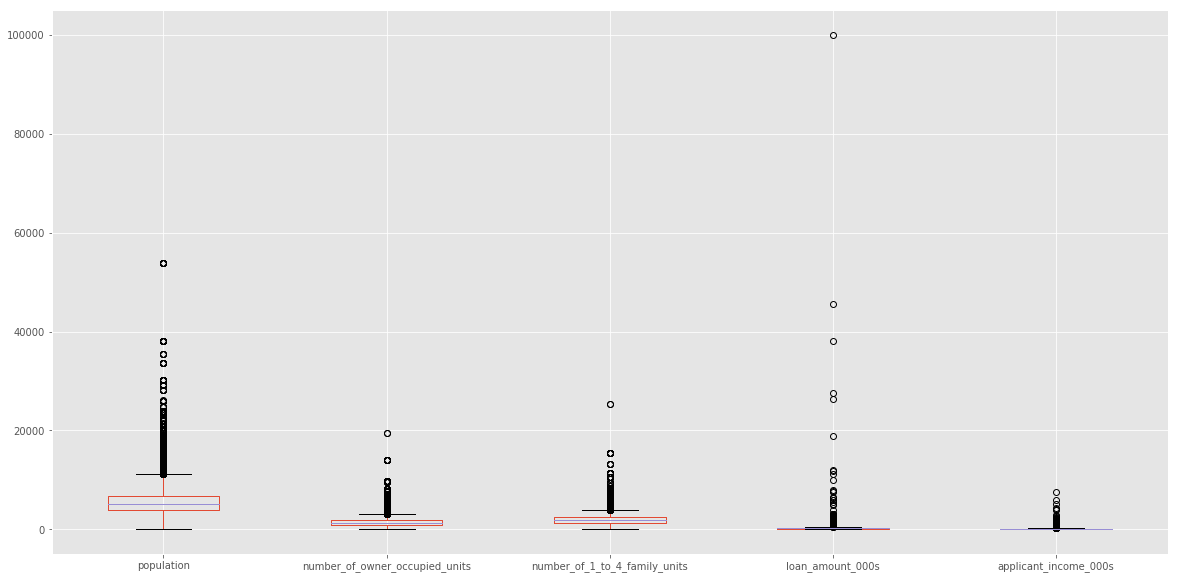

In [8]:
DATA[[ 'population', 
        'number_of_owner_occupied_units', 
        'number_of_1_to_4_family_units', 
        'loan_amount_000s', 
        'applicant_income_000s' 
        ]].plot(kind='box',figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AAEF58EF60>,
      dtype=object)

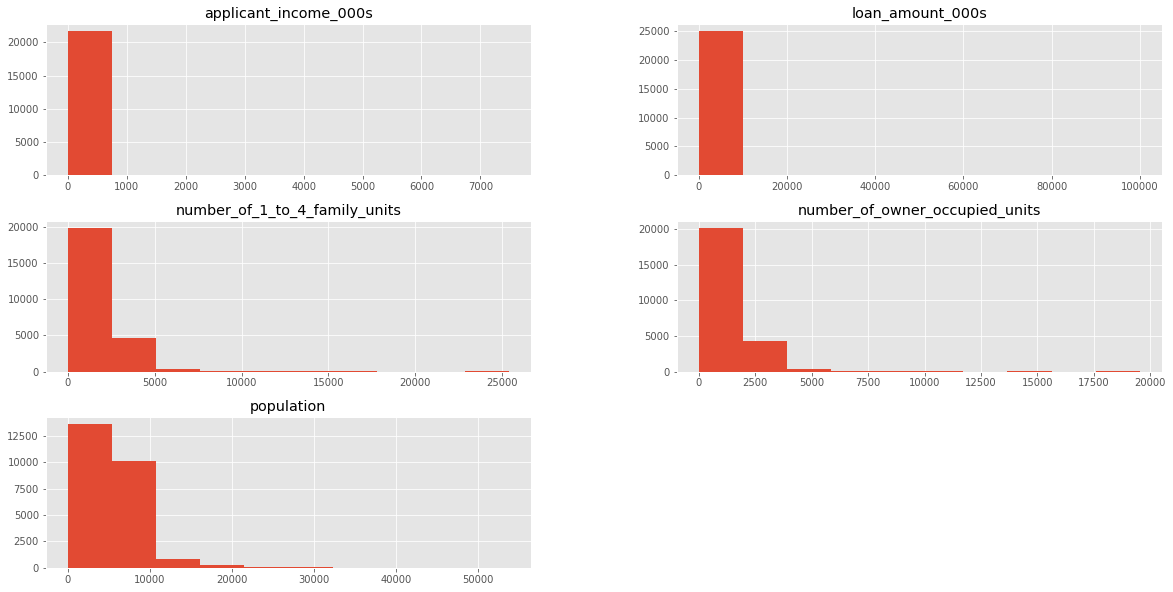

In [9]:
DATA[[ 'population', 
        'number_of_owner_occupied_units', 
        'number_of_1_to_4_family_units', 
        'loan_amount_000s', 
        'applicant_income_000s' 
        ]].hist(figsize=(20,10)) # Histogram for all features

#### Visualizing the distribution with a kernel density estimate:

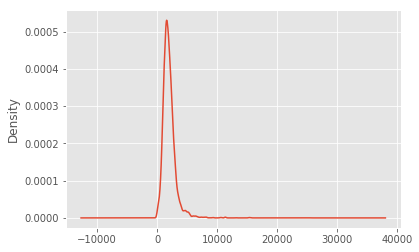

In [10]:
DATA['number_of_1_to_4_family_units'].plot(kind='kde')

#### Making a scatter plot matrix:

In [11]:
DATA_targ_numeric = DATA[['action_taken',
            'tract_to_msamd_income', 
            'population', 
            'minority_population', 
            'number_of_owner_occupied_units', 
            'number_of_1_to_4_family_units', 
            'loan_amount_000s', 
            'hud_median_family_income', 
            'applicant_income_000s' 
            ]]

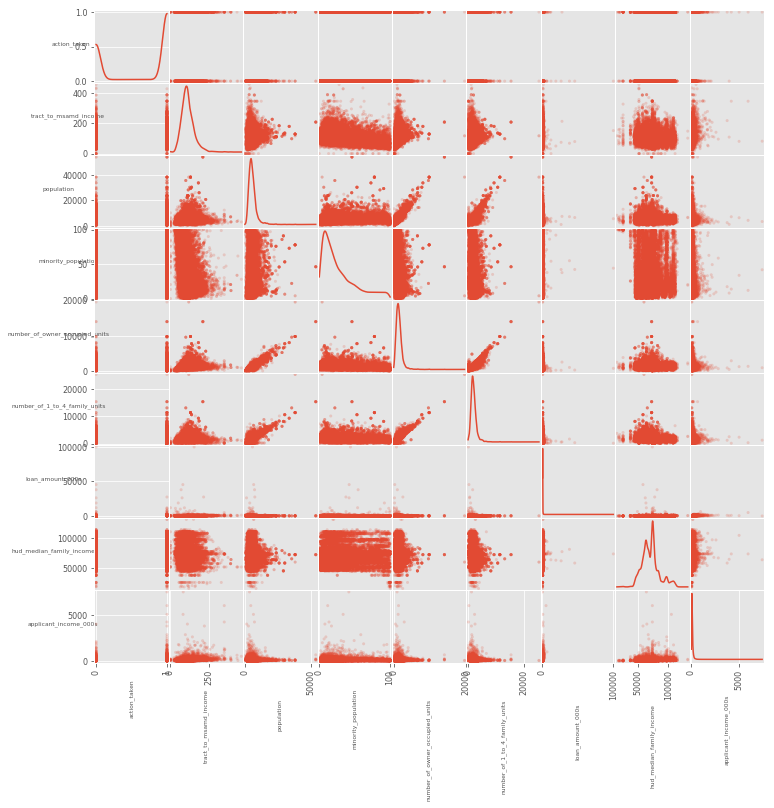

In [15]:
# Extract our X and y data
X = DATA_targ_numeric[:-1]
y = DATA_targ_numeric['action_taken']
# Create a scatter matrix of the dataframe features
from pandas.plotting import scatter_matrix
scatter_matrix = scatter_matrix(X, alpha=0.2, figsize=(12, 12), diagonal='kde')

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 6, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 6, rotation = 0)
    
plt.show()

### Don't forget about Matplotlib...

Sometimes you'll want to something a bit more custom (or you'll want to figure out how to tweak the labels, change the colors, make small multiples, etc), so you'll want to go straight to the Matplotlib documentation.
You will learn more about matplotlib.pyplot on the next Lab.

#### Tweak the labels
For example, say we want to tweak the labels on one of our graphs:

In [ ]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation=30)
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()


# Seaborn

##  Obtaining the Data For the Census Dataset

### Exploratory Data Analysis (EDA)



[Seaborn](https://seaborn.pydata.org/) is another great Python visualization library to have up your sleeve.

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. For a brief introduction to the ideas behind the package, you can read the introductory notes. More practical information is on the installation page. You may also want to browse the example gallery to get a sense for what you can do with seaborn and then check out the tutorial and API reference to find out how.

Seaborn has a lot of the same methods as Pandas, like [boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=box%2520plot#seaborn.boxplot) and [histograms](http://seaborn.pydata.org/generated/seaborn.distplot.html) (albeit with slightly different syntax!), but also comes with some novel tools

We will now use the census dataset to explore the use of visualizations in feature analysis and selection using this library.

#### Making a Countplot:

In this dataset, our target variable is data['income'] which is categorical. It would be interesting to see the frequencies of each class, relative to the target of our classifier. To do this, we can use the countplot function from the Python visualization package Seaborn to count the occurrences of each data point. Let's take a look at the counts of different categories in data['occupation'] and in data['education'] — two likely predictors of income in the Census data:

The [Countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function accepts either an x or a y argument to specify if this is a bar plot or a column plot. We chose to use the y argument so that the labels would be readable. The hue argument specifies a column for comparison; in this case we're concerned with the relationship of our categorical variables to the target income. Go ahead and explore other variables in the dataset, for example data.race and data.sex to see if those values are predictive of the level of income or not!

In [ ]:
DATA.columns

In [ ]:
ax = sns.countplot(y='loan_type_name', hue='action_taken', data=DATA,)

In [ ]:
ax = sns.countplot(y='state_abbr', hue='action_taken', data=DATA,)

In [ ]:
ax = sns.countplot(y='purchaser_type_name', hue='action_taken', data=DATA,)

In [ ]:
ax = sns.countplot(y='property_type_name', hue='action_taken', data=DATA,)

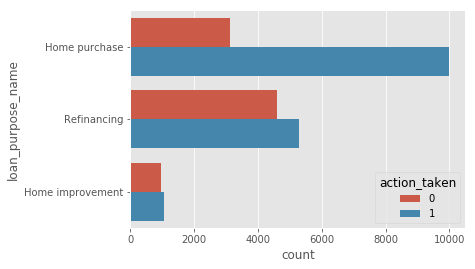

In [16]:
ax = sns.countplot(y='loan_purpose_name', hue='action_taken', data=DATA,)

In [ ]:
ax = sns.countplot(y='loan_type_name', hue='action_taken', data=DATA,)

In [ ]:
ax = sns.countplot(y='loan_type_name', hue='action_taken', data=DATA,)

In [ ]:
ax = sns.countplot(y='hoepa_status_name', hue='action_taken', data=DATA,)

In [ ]:
ax = sns.countplot(y='agency_name', hue='action_taken', data=DATA,)

In [ ]:
ax = sns.countplot(y='applicant_sex_name', hue='action_taken', data=DATA,)

In [ ]:
ax = sns.countplot(y='applicant_ethnicity_name', hue='action_taken', data=DATA,)

In [ ]:
ax = sns.countplot(y='applicant_race_name_1', hue='action_taken', data=DATA,)

In [ ]:
ax = sns.countplot(y='hoepa_status_name', hue='action_taken', data=DATA,)

In [ ]:
ax = sns.countplot(y='hoepa_status_name', hue='action_taken', data=DATA,)